In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-deep')

%matplotlib inline

In /home/marc/anaconda3/envs/tfgpu/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/marc/anaconda3/envs/tfgpu/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/marc/anaconda3/envs/tfgpu/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/marc/anaconda3/envs/tfgpu/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/marc/anaconda3/

# Histogram for Action Distribution

In [7]:
cs = 'C'

atten_c = np.load('results/commercial/attention_speed/TEST/speed_dist_{}_30.npy'.format(cs),allow_pickle=True)
att_c = np.array([])

for i in range(len(atten_c)):
    att_c = np.concatenate((att_c,atten_c[i]),axis=0)
        
        
cs = 'B'

atten_b = np.load('results/commercial/attention_speed/TEST/speed_dist_{}_30.npy'.format(cs),allow_pickle=True)
att_b = np.array([])

for i in range(len(atten_b)):
    att_b = np.concatenate((att_b,atten_b[i]),axis=0)
       
        
cs = 'A'

atten_a = np.load('results/commercial/attention_speed/TEST/speed_dist_{}_30.npy'.format(cs),allow_pickle=True)
att_a = np.array([])

for i in range(len(atten_a)):
    att_a = np.concatenate((att_a,atten_a[i]),axis=0)
       
#atten_a = np.array(actions)

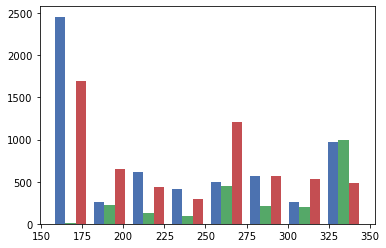

In [8]:
#fig = plt.figure()
counts,speed_bins,_= plt.hist([att_a,att_b,att_c],bins=8)

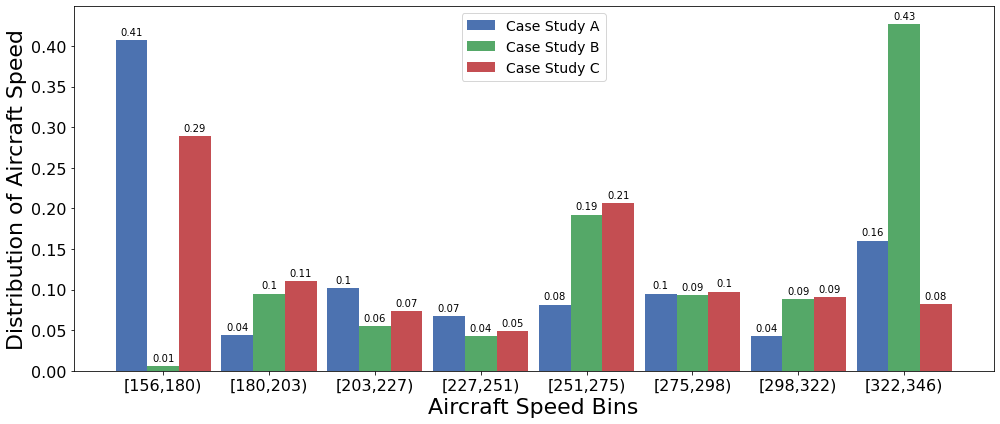

In [11]:
# plt.plot([0, 1], [0, 1], sns.xkcd_rgb["pale red"], lw=3)
# plt.plot([0, 1], [0, 2], sns.xkcd_rgb["medium green"], lw=3)
# plt.plot([0, 1], [0, 3], sns.xkcd_rgb["denim blue"], lw=3);


labels = list(np.round(speed_bins,0).astype(int))

range_label = []
for i in range(len(labels)-1):
    range_label.append('[{},{})'.format(labels[i],labels[i+1]))
#LSTM = counts[0]/sum(counts[0])
Atten_a = counts[0]/sum(counts[0])
Atten_b = counts[1]/sum(counts[1])
Atten_c = counts[2]/sum(counts[2])


x = np.arange(len(range_label))  # the label locations
width = .3  # the width of the bars

fig, ax = plt.subplots(figsize=(14,6))
rects1 = ax.bar(x - width, Atten_a, width, label='Case Study A')
rects2 = ax.bar(x, Atten_b, width, label='Case Study B')
rects3 = ax.bar(x + width, Atten_c, width, label='Case Study C')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Distribution of Aircraft Speed',fontsize=22)
ax.set_xlabel('Aircraft Speed Bins',fontsize=22)

#ax.set_title('Distribution of Actions for Case Study {}'.format(cs),fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(range_label)
ax.legend(fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=16)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        
        ax.annotate('{}'.format(np.round(height,2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=10)


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


fig.tight_layout()
fig.savefig('speed_dist_all.pdf',format='pdf',dpi=1000)
# fig.savefig('figures/action_dist_{}.png'.format(cs))

In [47]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])